# Instrodução aos Métodos Discretos

Nome: Yago Pereira dos Anjos Santos

1) Utilizando MDF, resolva o seguinte problema. Para este exercicio será necessário construir a matriz do Sistema Au=b e resolver o sistema linear resultante:
\begin{equation*}
    \begin{cases}
        \nabla^2 u = 0 &\text{ para } \Omega\\
        u = 75 &\text{ para } \partial\Omega_{A}\\
        u = 100 &\text{ para } \partial\Omega_{B}\\
        u = 50 &\text{ para } \partial\Omega_{C}\\
        \nabla u \cdot \vec{n} = 0 &\text{ para } \partial\Omega_{D}
    \end{cases}
\end{equation*}  


Resolvendo o sistema linear...


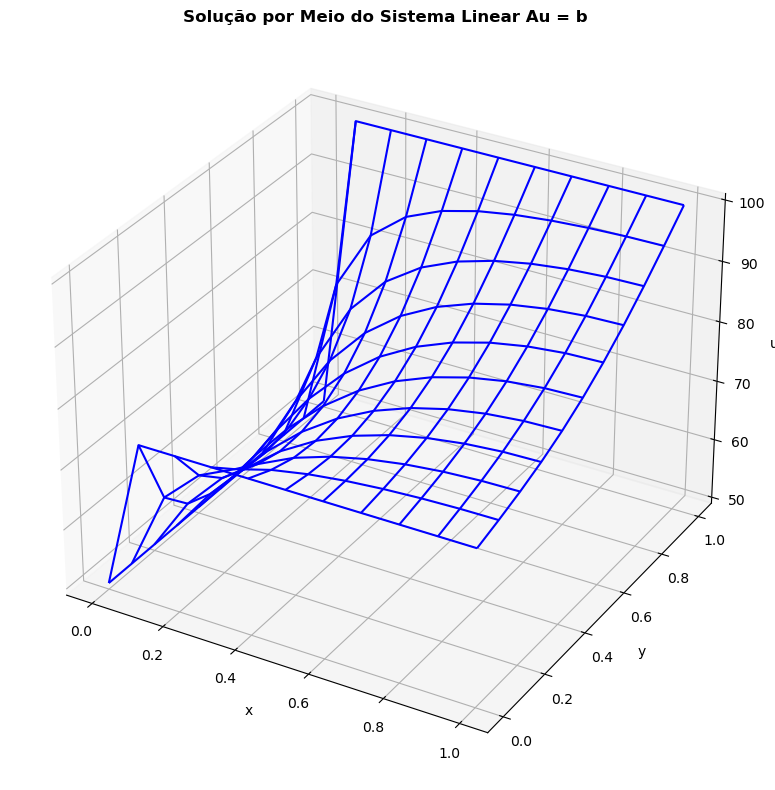

In [1]:
import numpy as np
from scipy.sparse import lil_matrix, csc_matrix, kron, eye
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt


''' Parâmetros do Problema '''
LX = 1.0
LY = 1.0

''' Discretização da malha usando h = 0.1 '''
h = 0.1
NX_total = int(LX / h) + 1
NY_total = int(LY / h) + 1

# Número de pontos incógnitas (pontos internos e de Neumann)
# x=0 (Dirichlet), x=1 (Neumann) -> incógnitas de x=h até x=1
NX_incognitas = NX_total - 1 
# y=0 (Dirichlet), y=1 (Dirichlet) -> incógnitas de y=h até y=1-h
NY_incognitas = NY_total - 2 

''' Condições de contorno de Dirichlet '''
u_A = 75.0  # y=0
u_B = 100.0 # y=1
u_C = 50.0  # x=0

''' Construção das Matrizes Unidimensionais '''

# Matriz 1D para a direção X (dimensões: NX_incognitas x NX_incognitas)
# Pontos de x=h até x=1
Ax = lil_matrix((NX_incognitas, NX_incognitas))
for i in range(NX_incognitas):
    if i < NX_incognitas - 1: # Pontos internos em X
        Ax[i, i] = 2.0
        if i > 0:
            Ax[i, i-1] = -1.0
        Ax[i, i+1] = -1.0
    else: # Ponto de Neumann na fronteira direita
        Ax[i, i] = 2.0
        Ax[i, i-1] = -2.0

# Matriz 1D para a direção Y (dimensões: NY_incognitas x NY_incognitas)
# Pontos de y=h até y=1-h
Ay = lil_matrix((NY_incognitas, NY_incognitas))
for j in range(NY_incognitas):
    Ay[j, j] = 2.0
    if j > 0:
        Ay[j, j-1] = -1.0
    if j < NY_incognitas - 1:
        Ay[j, j+1] = -1.0

''' Construção da Matriz do Sistema 2D com Kronecker '''
I_y = eye(NY_incognitas)
I_x = eye(NX_incognitas)

A = kron(I_y, Ax) + kron(Ay, I_x)
A = csc_matrix(A) # Converter para formato otimizado

''' Construção do Vetor b '''
N_incognitas = NX_incognitas * NY_incognitas
b = np.zeros(N_incognitas)

for j in range(NY_incognitas):
    for i in range(NX_incognitas):
        k = i + j * NX_incognitas
        
        if i == 0:
            b[k] += u_C
        
        if j == 0:
            b[k] += u_A

        if j == NY_incognitas - 1:
            b[k] += u_B

''' Resolvendo o Sistema Linear '''
print("Resolvendo o sistema linear...")
u_flat = spsolve(A, b)

''' Remodelando e Visualizando a Solução '''
u_incognitas = u_flat.reshape((NY_incognitas, NX_incognitas))
u = np.zeros((NY_total, NX_total))

u[1:NY_total-1, 1:NX_total] = u_incognitas
u[:, 0] = u_C
u[0, :] = u_A
u[NY_total-1, :] = u_B

# Tratando os cantos
u[0, 0] = u_C # Canto inferior esquerdo é 50
u[NY_total-1, 0] = u_C # Canto superior esquerdo é 50
u[0, NX_total-1] = u_A # Canto inferior direito é 75
u[NY_total-1, NX_total-1] = u_B # Canto superior direito é 100

# Visualização da solução
X, Y = np.meshgrid(np.linspace(0, LX, NX_total), np.linspace(0, LY, NY_total))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, u, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Solução por Meio do Sistema Linear Au = b', fontweight='bold')
plt.tight_layout()
plt.show()

2) Utilizando os métodos de Jacobi e Gauss-Seidel, resolva o mesmo problema. Compare o número de iterações necessárias para convergir com um erro relativo de $10^{-8}$ e $h=0.1$

### Comparação do Número de Iterações

Ao executar o algoritmo a seguir, com a implementação dos métodos iterativos de Jacobi e de Gauss-Seidel, obteve-se o total de 474 iterações para a convegência com o Método de Jacobi, enquanto para o método de Gauss-Seidel obteve-se o resultado do total de 360 iterações para a convergência. Ambos os métodos obedeceram as condições do enunciado do passo $h = 0.1$ e erro relativo de $10^{8}$. Desta forma, conclui-se que o método de Gauss-Seidel converge mais rapidamente, devido ao aproveitamento de cálculos já atualizados, de outras componentes, para atualizar a componente que está sendo calculada.

Executando o Método de Jacobi...
Jacobi convergiu em 474 iterações.
Executando o Método de Gauss-Seidel...
Gauss-Seidel convergiu em 360 iterações.


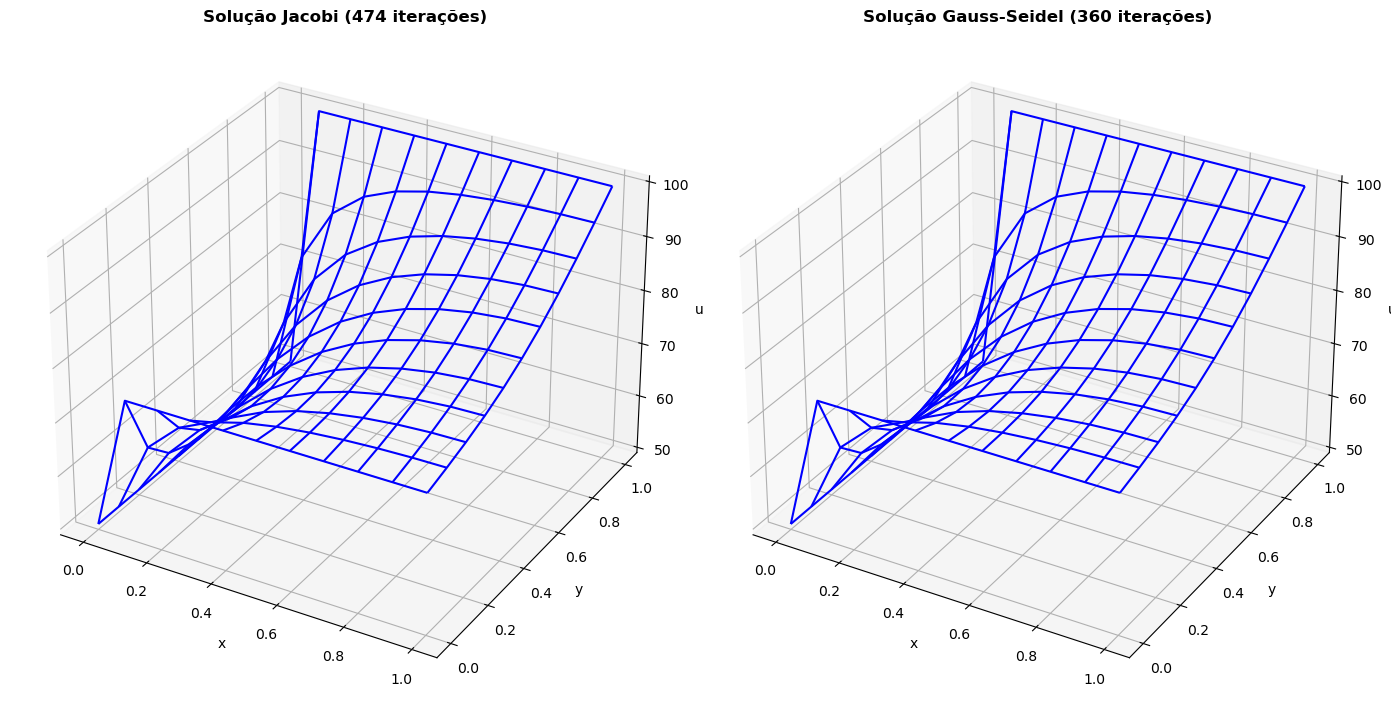


--- Comparação ---
Jacobi: 474 iterações
Gauss-Seidel: 360 iterações


In [2]:
# Parâmetros do Problema
LX = 1.0
LY = 1.0

# Discretização da malha com h=0.1
h = 0.1
NX_total = int(LX / h) + 1
NY_total = int(LY / h) + 1

# Condições de contorno de Dirichlet
u_A = 75.0  # y=0
u_B = 100.0 # y=1
u_C = 50.0  # x=0

# Tolerância e limite de iterações
tol = 1e-8
max_iter = 10000

#  Função para Inicializar a Malha com Condições de Contorno
def initialize_grid(nx, ny, u_a, u_b, u_c):
    ''' Inicializa uma malha de solução com as condições de contorno de Dirichlet. '''
    u_grid = np.zeros((ny, nx))
    u_grid[0, :] = u_a
    u_grid[ny-1, :] = u_b
    u_grid[:, 0] = u_c
    u_grid[0, 0] = u_c
    u_grid[ny-1, 0] = u_c
    u_grid[0, nx-1] = u_a
    u_grid[ny-1, nx-1] = u_b
    return u_grid

''' Método de Jacobi '''
print("Executando o Método de Jacobi...")
u_jacobi = initialize_grid(NX_total, NY_total, u_A, u_B, u_C)

n_jacobi_iter = 0
u_old_jacobi = u_jacobi.copy()

for k in range(max_iter):
    u_new_jacobi = u_old_jacobi.copy()
    
    for j in range(1, NY_total - 1):
        for i in range(1, NX_total):
            if i == NX_total - 1:
                u_new_jacobi[j, i] = 0.25 * (2 * u_old_jacobi[j, i-1] + u_old_jacobi[j+1, i] + u_old_jacobi[j-1, i])
            else:
                u_new_jacobi[j, i] = 0.25 * (u_old_jacobi[j, i+1] + u_old_jacobi[j, i-1] + u_old_jacobi[j+1, i] + u_old_jacobi[j-1, i])

    error_rel = np.linalg.norm(u_new_jacobi - u_old_jacobi) / np.linalg.norm(u_new_jacobi)
    if error_rel < tol:
        n_jacobi_iter = k + 1
        u_jacobi = u_new_jacobi
        break
    u_old_jacobi = u_new_jacobi.copy()

print(f"Jacobi convergiu em {n_jacobi_iter} iterações.")

''' Método de Gauss-Seidel '''
print("Executando o Método de Gauss-Seidel...")
u_gauss_seidel = initialize_grid(NX_total, NY_total, u_A, u_B, u_C)

n_gs_iter = 0

for k in range(max_iter):
    u_old_gs = u_gauss_seidel.copy()
    
    for j in range(1, NY_total - 1):
        for i in range(1, NX_total):
            if i == NX_total - 1:
                u_gauss_seidel[j, i] = 0.25 * (2 * u_gauss_seidel[j, i-1] + u_old_gs[j+1, i] + u_old_gs[j-1, i])
            else:
                u_gauss_seidel[j, i] = 0.25 * (u_old_gs[j, i+1] + u_gauss_seidel[j, i-1] + u_old_gs[j+1, i] + u_old_gs[j-1, i])

    error_rel = np.linalg.norm(u_gauss_seidel - u_old_gs) / np.linalg.norm(u_gauss_seidel)
    if error_rel < tol:
        n_gs_iter = k + 1
        break

print(f"Gauss-Seidel convergiu em {n_gs_iter} iterações.")

''' Plotando as Soluções para Comparação '''
X, Y = np.meshgrid(np.linspace(0, LX, NX_total), np.linspace(0, LY, NY_total))

fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, u_jacobi, color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u')
ax1.set_title(f'Solução Jacobi ({n_jacobi_iter} iterações)', fontweight='bold')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(X, Y, u_gauss_seidel, color='blue')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u')
ax2.set_title(f'Solução Gauss-Seidel ({n_gs_iter} iterações)', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n--- Comparação ---")
print(f"Jacobi: {n_jacobi_iter} iterações")
print(f"Gauss-Seidel: {n_gs_iter} iterações")